In [1]:
# Numerical libraries
import numpy as np
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

# importing seaborn for statistical plots
import seaborn as sns

In [2]:

# Simple linear model
def linear_model(x,y):
    linear = LinearRegression()
    linear.fit(x, y)
    return linear

# Simple ridge model
def ridge_model(x,y,alpha_):
    ridge = Ridge(alpha = alpha_)
    ridge.fit(x, y)
    return ridge

# Simple lasso model
def lasso_model(x,y,alpha_):
    lasso = Lasso(alpha = alpha_)
    lasso.fit(x, y)
    return lasso



In [3]:
# assign value "mpg_df" to file
mpg_df = pd.read_csv("E:\Python\Linear\Data\Miles_per_gallon.csv")
# delete the column 'car name'
mpg_df=mpg_df.drop('car name',axis=1)
# delete the row which don't have value in col 'hoursepower'
mpg_df=mpg_df.loc[mpg_df['horsepower'] != '?']

#'mpg' is dependent variable so drop it . Copying rest of the columns to X
X = mpg_df.drop('mpg', axis=1)
#Copying the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df[['mpg']]

X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)  # ideally the training and test should be

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3)

linear = linear_model(x_train, y_train)
ridge = ridge_model(x_train, y_train, 2)
lasso = lasso_model(x_train, y_train, 0.1)

In [4]:
# Coefficient and Intercept
print("Linear:")
print("Beta:", linear.coef_[0])
print("Intercept:", linear.intercept_)

Linear:
Beta: [-0.06627752  0.2034371  -0.09307921 -0.67698236  0.02939628  0.36019804
  0.15619948]
Intercept: [0.00565116]


In [5]:
print("Ridge:")
print("Beta:", ridge.coef_[0])
print("Intercept:",ridge.intercept_)

Ridge:
Beta: [-0.05139472  0.13403189 -0.11367573 -0.61397326  0.0156783   0.35456405
  0.15281502]
Intercept: [0.00459239]


In [6]:
print("Lasso:")
print("Beta:", lasso.coef_)
print("Intercept:", lasso.intercept_)

Lasso:
Beta: [-0.         -0.         -0.04801514 -0.5805855   0.          0.28201214
  0.06250821]
Intercept: [0.00954043]


In [7]:
# Comparing the score
print(linear.score(x_train, y_train))
print(linear.score(x_test, y_test))

print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.8195073722132156
0.8242709435939639
0.8191616903541354
0.8216306253651049
0.7996421115493939
0.8155192106366749


In [8]:
Train = [[],[],[]]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3)
    linear = linear_model(x_train, y_train)
    ridge = ridge_model(x_train, y_train, 2)
    lasso = lasso_model(x_train, y_train, 0.05)
    Train[0].append(linear.score(x_test, y_test))
    Train[1].append(ridge.score(x_test, y_test))
    Train[2].append(lasso.score(x_test, y_test))
print(Train)

[[0.7588217966089036, 0.8345489799649177, 0.8368907893770765, 0.8280993674112206, 0.8031722304267966, 0.8178998674369486, 0.8053185448540404, 0.8133589950133778, 0.7799946827669665, 0.8100920649491221, 0.8440289153521408, 0.7439555644484098, 0.8175104200738945, 0.8082635677543247, 0.7962411071699729, 0.7980816235303332, 0.7942629215511755, 0.8009114038423354, 0.8184140853355606, 0.8138976292736716, 0.8159488066377216, 0.7944449292693703, 0.8056721782903521, 0.8039438403937064, 0.7903967647862139, 0.7858756420940323, 0.8170822308387781, 0.8203438088872588, 0.7901555979535331, 0.7944888444738556, 0.7863765393114155, 0.8284312005881674, 0.7872743759446617, 0.8121866565522396, 0.8170549783633859, 0.8134527471175081, 0.7647935544935457, 0.792258681666124, 0.7892408687543199, 0.7871653219494823, 0.8449154107719212, 0.8074897818822084, 0.8223723627869037, 0.7978104664088262, 0.8204187719601611, 0.8432434501885933, 0.8247048799584037, 0.8161249197518371, 0.757151668580932, 0.8076422770628248, 

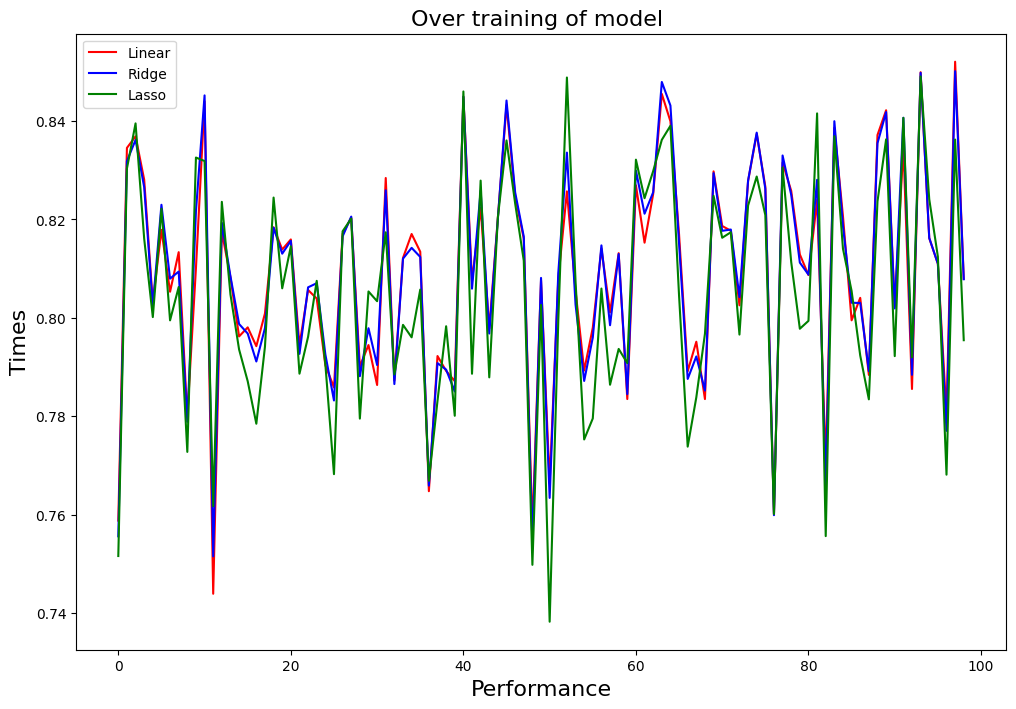

In [9]:

plt.figure(figsize= (12, 8))
plt.plot(Train[0], color='red', label = "Linear")
plt.plot(Train[1], color='blue', label = "Ridge")
plt.plot(Train[2], color='green', label = "Lasso")
plt.xlabel('Performance', fontsize=16)
plt.ylabel('Times', fontsize=16)
plt.title('Over training of model ', fontsize=16)
plt.legend()
plt.show()
